<h1> Battle of the Businesses in a Neighbourhood </h1>
<b>Building a model to determine best business to start in a popular Neighborhood</b><br>
<i><b> Let's import the libraries</b></i>

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

! pip install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

!pip install folium
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [2]:
!pip install lxml
!pip install BeautifulSoup4

<h2> Loading the data of Toronto</h2>
<i> Data source is wikipedia</i>

In [3]:
from pandas.io.html import read_html
page = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
wikitables = read_html(page,  attrs={"class":"wikitable"})

print ("Extracted {num} wikitables".format(num=len(wikitables)))

Extracted 1 wikitables


In [4]:
df = wikitables[0]
df.head()

,Postal Code,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


<h2> Pre processing the data </h2>
<p> The data has some values as "Not assigned" so let's process the data</p>

In [5]:
df.drop(df[df['Borough'] == "Not assigned"].index, inplace = True) 
df_group = df.groupby(['Postal Code', 'Borough']) 
mask = df_group['Neighborhood'] == "Not assigned"
df_group.first()

,,Neighborhood
Postal Code,Borough,
M1B,Scarborough,"Malvern, Rouge"
M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
M1E,Scarborough,"Guildwood, Morningside, West Hill"
M1G,Scarborough,Woburn
M1H,Scarborough,Cedarbrae
M1J,Scarborough,Scarborough Village
M1K,Scarborough,"Kennedy Park, Ionview, East Birchmount Park"
M1L,Scarborough,"Golden Mile, Clairlea, Oakridge"
M1M,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West"


<p> The above data is processed but 2 columns are missing<br>
    Latitude<br>
    Longitude<br>
So let's load the location data</p>

In [6]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_3cabec16fb844d25b951e1aedb322ebd = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='eLry4lzLM6IKo-LyesThC1rP53kjqtU3Ey2Yms2CP73U',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_3cabec16fb844d25b951e1aedb322ebd.get_object(Bucket='capstoneproject-donotdelete-pr-v9gmfw9gawi7ld',Key='Geospatial_Coordinates.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data.head()


,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


<P> Let's merge the above datsets together</P

In [7]:
data.rename(columns = {'PostalCode':'Postal Code'}, inplace = True) 
df = pd.merge(df,data, how ='inner', on ='Postal Code')
df.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


<h3> Et Voilà, we have our dataset ready!!!</h3>

Let's plot a map of Toronto with the help of the above dataset

In [8]:
address = 'Toronto'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto City are 43.6534817, -79.3839347.


In [9]:
# create map of New York using latitude and longitude values
map_tor = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df['Latitude'], df['Longitude'], df['Borough'], df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_tor)  
    
map_tor

<i> This data consist of different boroughs, neighborhoods, latitude and longitude.<br>
Lets see how many boroughs and neighborhood we have here.</i>

In [10]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(df['Borough'].unique()),
        df.shape[0]
    )
)

The dataframe has 10 boroughs and 103 neighborhoods.


<i> As we have 10 boroughs, let's see which boroughs we have</i>

In [11]:
df['Borough'].unique()

array(['North York', 'Downtown Toronto', 'Etobicoke', 'Scarborough',
       'East York', 'York', 'East Toronto', 'West Toronto',
       'Central Toronto', 'Mississauga'], dtype=object)

In [12]:
df['Borough'].value_counts()

North York          24
Downtown Toronto    19
Scarborough         17
Etobicoke           12
Central Toronto      9
West Toronto         6
East Toronto         5
York                 5
East York            5
Mississauga          1
Name: Borough, dtype: int64

<b> The unique Boroughs with their neighborhood counts are shown above<br>
Let us analyse the top borough that is "North York"</b>

In [13]:
ny_data = df[df['Borough'] == 'North York'].reset_index(drop=True)
ny_data

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
3,M3B,North York,Don Mills,43.745906,-79.352188
4,M6B,North York,Glencairn,43.709577,-79.445073
5,M3C,North York,Don Mills,43.725900,-79.340923
6,M2H,North York,Hillcrest Village,43.803762,-79.363452
7,M3H,North York,"Bathurst Manor, Wilson Heights, Downsview North",43.754328,-79.442259
8,M2J,North York,"Fairview, Henry Farm, Oriole",43.778517,-79.346556
9,M3J,North York,"Northwood Park, York University",43.767980,-79.487262


Here we created a dataframe which consist of only 'North York" data

So to analyse this Borough throughly we first need to create our Foursquare credentials

In [14]:
CLIENT_ID = 'DJ135TQTVW5F3MZWNNGHOTRR451QGERLTMADB0C3SESDD5IU' # your Foursquare ID
CLIENT_SECRET = 'BLASL0GMLNSLFEPL0R331EWYAW4UOPT5VAT34BCKHSP1QNIR' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: DJ135TQTVW5F3MZWNNGHOTRR451QGERLTMADB0C3SESDD5IU
CLIENT_SECRET:BLASL0GMLNSLFEPL0R331EWYAW4UOPT5VAT34BCKHSP1QNIR


<b>Testing Foursquare</b>

In [15]:
ny_data.loc[0, 'Neighborhood']

'Parkwoods'

In [16]:
neighborhood_latitude = ny_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = ny_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = ny_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Parkwoods are 43.7532586, -79.3296565.


<h3>Top venues in Parkwood</h3>

In [17]:

LIMIT = 100 # limit of number of venues returned by Foursquare API


radius = 500 # define radius


 #create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=DJ135TQTVW5F3MZWNNGHOTRR451QGERLTMADB0C3SESDD5IU&client_secret=BLASL0GMLNSLFEPL0R331EWYAW4UOPT5VAT34BCKHSP1QNIR&v=20180605&ll=43.7532586,-79.3296565&radius=500&limit=100'

In [18]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5efa1a7d30567d545e1f8622'},
 'response': {'warning': {'text': "There aren't a lot of results near you. Try something more general, reset your filters, or expand the search area."},
  'headerLocation': 'Parkwoods - Donalda',
  'headerFullLocation': 'Parkwoods - Donalda, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 2,
  'suggestedBounds': {'ne': {'lat': 43.757758604500005,
    'lng': -79.32343823984928},
   'sw': {'lat': 43.7487585955, 'lng': -79.33587476015072}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4e8d9dcdd5fbbbb6b3003c7b',
       'name': 'Brookbanks Park',
       'location': {'address': 'Toronto',
        'lat': 43.751976046055574,
        'lng': -79.33214044722958,
        'labeledLatLngs': 

In [19]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [20]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Brookbanks Park,Park,43.751976,-79.332140
1,Variety Store,Food & Drink Shop,43.751974,-79.333114


In [21]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

2 venues were returned by Foursquare.


<h2> Exploring Neighbourhoods in North York to find the popular Neighbourhoods</h2>

In [22]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [23]:
ny_venues = getNearbyVenues(names=ny_data['Neighborhood'],
                                   latitudes=ny_data['Latitude'],
                                   longitudes=ny_data['Longitude']
                                  )

Parkwoods
Victoria Village
Lawrence Manor, Lawrence Heights
Don Mills
Glencairn
Don Mills
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Fairview, Henry Farm, Oriole
Northwood Park, York University
Bayview Village
Downsview
York Mills, Silver Hills
Downsview
North Park, Maple Leaf Park, Upwood Park
Humber Summit
Willowdale, Newtonbrook
Downsview
Bedford Park, Lawrence Manor East
Humberlea, Emery
Willowdale, Willowdale East
Downsview
York Mills West
Willowdale, Willowdale West


In [24]:
print(ny_venues.shape)
ny_venues.head()

(244, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
2,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
3,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant
4,Victoria Village,43.725882,-79.315572,Tim Hortons,43.725517,-79.313103,Coffee Shop


In [28]:
ny = ny_venues['Neighborhood'].value_counts()
ny = ny.head(2)

In [29]:
ny

Fairview, Henry Farm, Oriole    67
Willowdale, Willowdale East     34
Name: Neighborhood, dtype: int64

## Let's get a neighborhood with maximum venues

As we can see the neighbourhood with maximum venues is Fairview, Henry Farm, Oriole

In [30]:
top1ny = ny_venues[ny_venues['Neighborhood'] == 'Fairview, Henry Farm, Oriole'].reset_index(drop=True)
top1ny.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,The LEGO Store,43.778207,-79.343483,Toy / Game Store
1,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,DAVIDsTEA,43.777593,-79.345089,Tea Room
2,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,Purdys Chocolatier,43.778160,-79.344154,Chocolate Shop
3,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,CF Fairview Mall,43.777994,-79.343665,Shopping Mall
4,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,Michel's Baguette,43.777082,-79.344557,Bakery


# Lets find the popular venue category in the neighborhood<br>
Fairview, Henry Farm, Oriole

In [31]:
top1ny.groupby('Venue Category').count()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude
Venue Category,,,,,,
American Restaurant,1,1,1,1,1,1
Asian Restaurant,1,1,1,1,1,1
Bakery,2,2,2,2,2,2
Bank,2,2,2,2,2,2
Bar,1,1,1,1,1,1
Baseball Field,1,1,1,1,1,1
Boutique,1,1,1,1,1,1
Burger Joint,1,1,1,1,1,1
Burrito Place,1,1,1,1,1,1


Let's see how many unique local businesses we have in this neighborhood

In [32]:
print('There are {} uniques categories.'.format(len(top1ny['Venue Category'].unique())))

There are 43 uniques categories.


# Top 3 most common business categories 

In [33]:
b1 = top1ny['Venue Category'].value_counts()
b1=b1.head(3)
b1

Clothing Store    8
Coffee Shop       5
Restaurant        4
Name: Venue Category, dtype: int64

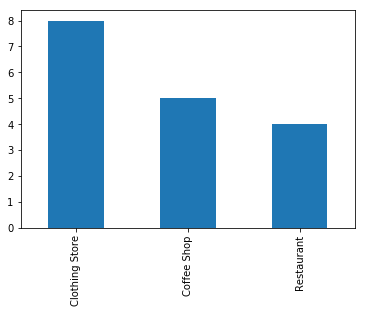

In [35]:
b1.plot(kind = 'bar')

These are the common businesses in the area<br>
So what is the business category which has less competition<br>
# Let's see least competitive businesses in the area

In [36]:
blueocean1 = top1ny['Venue Category'].value_counts()
blueocean1=blueocean1.tail(3)
blueocean1

Luggage Store    1
Bar              1
Theater          1
Name: Venue Category, dtype: int64

<b> The least competitve businesses are :
    1. Luggage store
    2. Bar
    3. Theater

## Let's get 2nd popular neighborhood
Willowdale, Willowdale East

In [37]:
top2ny = ny_venues[ny_venues['Neighborhood'] == 'Willowdale, Willowdale East'].reset_index(drop=True)
top2ny.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Willowdale, Willowdale East",43.77012,-79.408493,Loblaws,43.768722,-79.412101,Grocery Store
1,"Willowdale, Willowdale East",43.77012,-79.408493,Starbucks,43.768353,-79.413046,Coffee Shop
2,"Willowdale, Willowdale East",43.77012,-79.408493,Aroma Espresso Bar,43.769449,-79.413081,Café
3,"Willowdale, Willowdale East",43.77012,-79.408493,Konjiki Ramen,43.766998,-79.412222,Ramen Restaurant
4,"Willowdale, Willowdale East",43.77012,-79.408493,The Keg,43.766579,-79.412131,Steakhouse


# Lets find the popular venue category for second neighborhood<br>
Willowdale, Willowdale East

In [38]:
top2ny.groupby('Venue Category').count()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude
Venue Category,,,,,,
Arts & Crafts Store,1,1,1,1,1,1
Bubble Tea Shop,1,1,1,1,1,1
Café,2,2,2,2,2,2
Coffee Shop,2,2,2,2,2,2
Discount Store,1,1,1,1,1,1
Electronics Store,1,1,1,1,1,1
Fast Food Restaurant,1,1,1,1,1,1
Grocery Store,1,1,1,1,1,1
Hotel,1,1,1,1,1,1


In [39]:
print('There are {} uniques categories.'.format(len(top2ny['Venue Category'].unique())))

There are 26 uniques categories.


In [40]:
b2 = top2ny['Venue Category'].value_counts()
b2=b2.head(3)
b2

Ramen Restaurant       3
Sandwich Place         2
Japanese Restaurant    2
Name: Venue Category, dtype: int64

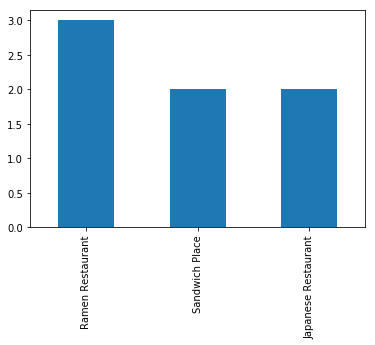

In [41]:
b2.plot(kind = 'bar')

In [42]:
blueocean2 = top2ny['Venue Category'].value_counts()
blueocean2=blueocean2.tail(3)
blueocean2

Restaurant    1
Lounge        1
Plaza         1
Name: Venue Category, dtype: int64

<b> The least competitve businesses are :
    1. Restaurant
    2. Lounge
    3. Plaza

# Let us see the overall neighbourhood on map which is best location to start a business

In [43]:
nyclust = top1ny
nyclust.append(top2ny,ignore_index = True)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,The LEGO Store,43.778207,-79.343483,Toy / Game Store
1,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,DAVIDsTEA,43.777593,-79.345089,Tea Room
2,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,Purdys Chocolatier,43.778160,-79.344154,Chocolate Shop
3,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,CF Fairview Mall,43.777994,-79.343665,Shopping Mall
4,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,Michel's Baguette,43.777082,-79.344557,Bakery
5,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,De Berardini's,43.778069,-79.342642,Salon / Barbershop
6,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,SilverCity,43.778681,-79.344085,Movie Theater
7,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,New York Fries - Fairview Mall,43.778605,-79.343577,Restaurant
8,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,Hero Certified Burgers,43.777295,-79.344584,Burger Joint
9,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,Apple Fairview,43.777883,-79.343789,Electronics Store


In [44]:
#zoom in to see the location
map_ny = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(nyclust['Venue Latitude'], nyclust['Venue Longitude'], nyclust['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_ny)  
    
map_ny

<h2>We can use this model to analyse different neighbourhoods / boroughs / cities / countries as well </h2>

<h2> Thank You!!</h2>